In [1]:
## Import Packages
import pandas as pd 
import numpy as np

## plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

## Setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

## For naromalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [2]:
## read the file
df = pd.read_csv("Tesla.csv - Tesla.csv.csv")

## Head of the file
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
## Shape of the data
df.shape

(1692, 7)

In [4]:
## Checking null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [5]:
## Setting index as date 
df['Date'] = pd.to_datetime(df.Date)

df.index = df["Date"]

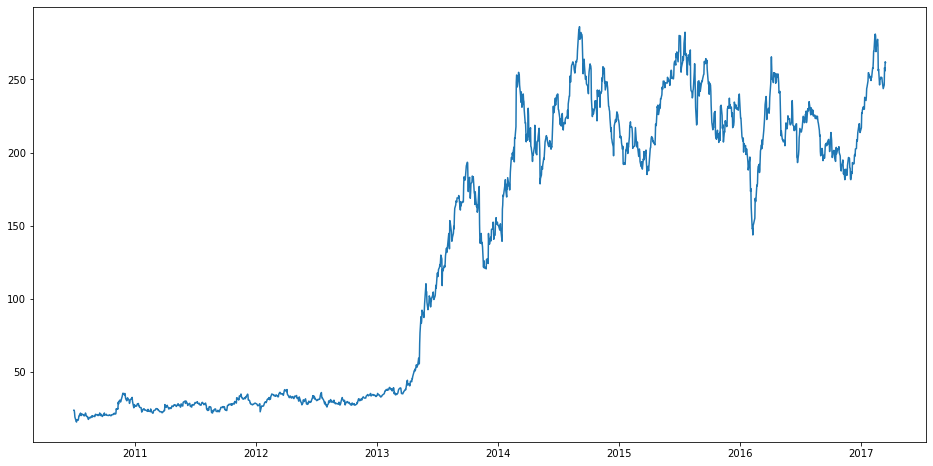

In [6]:
# plot
plt.figure(figsize =(16,8))
plt.plot(df["Close"],label="close price history")

In [7]:
# creating dataframe with date and target variable

data = df.sort_index(ascending=True, axis=0)

new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

In [8]:
for i in range(0,len(data)):
    new_data['Date'] [i] = data['Date'] [i]
    new_data['Close'] [i] = data['Close'] [i]

In [9]:
# Spliting data into train and validation

train_data = new_data[:1389]

valid_data = new_data[1389:]

In [10]:
# Shape of training data
print('Shape of training data: ',train_data.shape)

# shape of validation data
print('shape of validaton data: ',valid_data.shape)

Shape of training data:  (1389, 2)
shape of validaton data:  (303, 2)


In [11]:
# create predictions for the validation set and check the RMSE using the actual values.
# making predictions
pred = []
for i in range(0,valid_data.shape[0]):
    x = train_data["Close"][len(train_data)- 303+i:].sum()+sum(pred)
    y = x / 303
    pred.append(y)

In [12]:
# Checking result of RMSE value 
rmse = np.sqrt(np.mean(np.power((np.array(valid_data['Close'])-pred),2)))
print("RMSE value of validation set: ",rmse)

RMSE value of validation set:  30.21956676691666


<ipython-input-13-cf5972ce55dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['prediction'] = 0
<ipython-input-13-cf5972ce55dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['prediction'] = pred


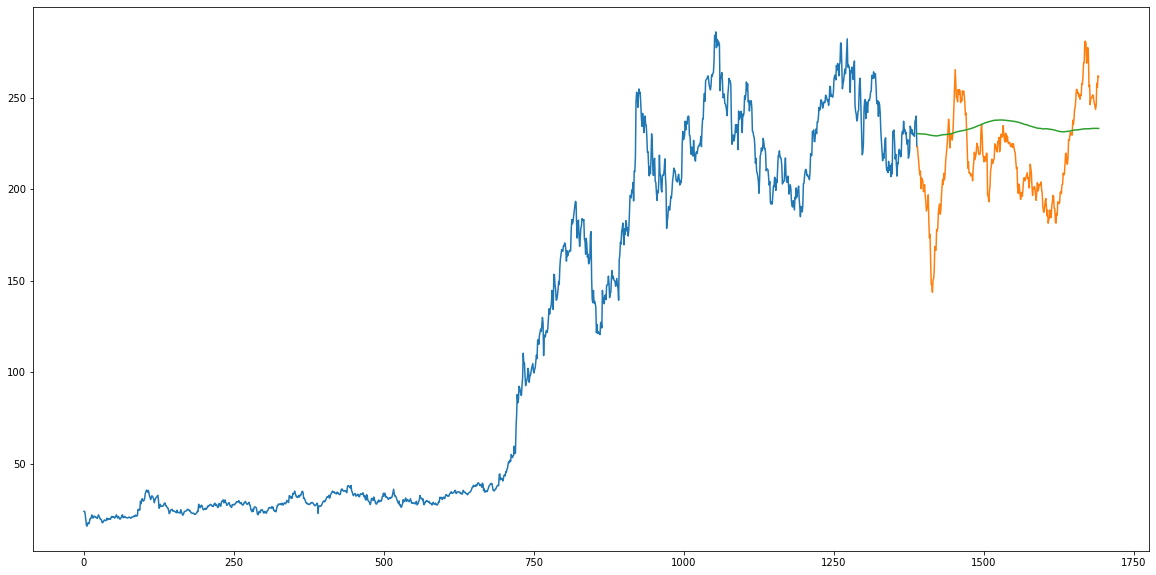

In [13]:
# plot of the predicted values along with the actual values

valid_data['prediction'] = 0
valid_data['prediction'] = pred
plt.plot(train_data["Close"])
plt.plot(valid_data[["Close","prediction"]])

### Auto ARIMA Model

ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:

p (past values used for forecasting the next value),
q (past forecast errors used to predict the future values),
d (order of differencing)

Parameter tuning for ARIMA consumes a lot of time. So we will use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error.

In [14]:
!pip install pyramid

In [15]:
! pip install pmdarima

In [16]:
from pmdarima.arima import auto_arima

train = train_data['Close']
valid = valid_data['Close']


In [17]:
# Building the Model

model = auto_arima(train, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=12.46 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=8846.711, Time=0.22 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=8433.912, Time=1.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=5.56 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=8848.414, Time=0.27 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=8314.756, Time=2.40 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=20.33 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=10.08 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=8312.781, Time=1.74 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=8431.922, Time=0.93 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=13.47 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.88 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=8314.755, Time=3.08 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=25.98 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=8314.7

In [18]:
# Fit the model

model.fit(train)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [19]:
# Forecast the model 
forecast = model.predict(n_periods= 303)

forecast = pd.DataFrame(forecast,index=valid.index,columns=['prediction'])

In [20]:
RMSE = np.sqrt(np.mean(np.power((np.array(valid_data['Close'])-np.array(forecast['prediction'])),2)))
RMSE

27.977384552150326

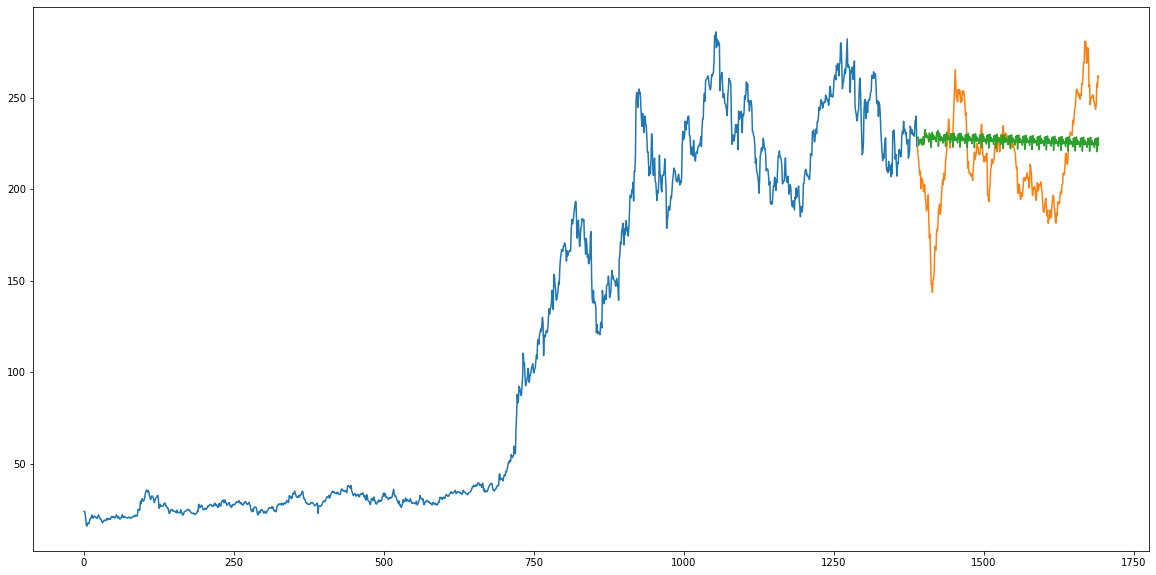

In [21]:
# Ploting forecasting results

plt.plot(train_data["Close"])

plt.plot(valid_data["Close"])

plt.plot(forecast['prediction'])